In [1]:
using FFTW
using LinearAlgebra
using ProgressMeter
using BenchmarkTools
using Plots
pyplot()

Plots.PyPlotBackend()

In [4]:
include("../src/mesh.jl")
include("../src/times.jl")
abstract type AbstractModel end
include("../src/models/cheng.jl")
include("../src/models/matsuno.jl")
include("../src/fig.jl")
include("../src/solvers.jl")

step! (generic function with 1 method)

(epsilon, N, L, T, dt) = (0.5, 4096, 10, 5, 0.001)


Progress:  97%|████████████████████████████████████████ |  ETA: 0:00:00

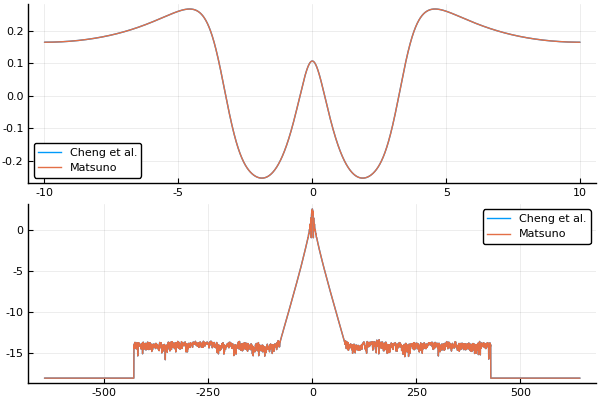

In [5]:
function solve!(model::AbstractModel, h, u, times::Times, solver::TimeSolver)
                
    prog = Progress(times.Nt,1) 
    
    model.data = []
  
    push!(model.data,(h,u))
    for l in range(1,times.Nt-1)
        
        dt = times.t[l+1]-times.t[l]
        
        step!( solver, model, h, u, dt)
    
        push!(model.data,(h,u))   
        next!(prog)
    end
            
end

epsilon = 1/2
N       = 2^12
L       = 10
T       = 5
dt      = 0.001

@show epsilon,N,L,T,dt

mesh   = Mesh(-L, L, N)
times  = Times(dt, T)
solver = RK4( N )

h  = zeros(Complex{Float64}, N)
u  = zeros(Complex{Float64}, N)

models = [Cheng(mesh, epsilon), Matsuno(mesh, epsilon)]

for model in models
        
    h .= exp.(-mesh.x.^2)
    u .= 0.0

    h .= model.Pi .* fft(h)
    u .= model.Pi .* fft(u)
    
    solve!(model, h, u, times, solver )

end

fig(5, times, models, mesh)

In [6]:
models[1].data

5001-element Array{Tuple{Array{Complex{Float64},1},Array{Complex{Float64},1}},1}:
 ([362.999+0.0im, 353.616+3.74939e-15im, -228.365-2.73143e-15im, -66.9895-1.91653e-15im, 204.147+8.58718e-15im, -163.964-1.05271e-14im, 64.7996-3.53977e-16im, -4.01189+3.41873e-15im, -0.117609-6.85657e-16im, -19.7705-1.89346e-16im  …  30.6305+1.13193e-15im, -19.7705-3.58053e-15im, -0.117609+2.78717e-15im, -4.01189-1.71634e-16im, 64.7996-4.81698e-15im, -163.964+3.10999e-15im, 204.147-4.05569e-15im, -66.9895-2.40034e-15im, -228.365-2.06206e-15im, 353.616+1.62557e-14im], [1.67745e-15+2.19735e-16im, 2.73994e-16+87.7019im, -4.3389e-15+193.051im, 3.05311e-15-284.714im, -4.21633e-15+149.101im, 5.66373e-17+24.8355im, 1.98826e-15-95.5842im, 5.78271e-15+62.2942im, -3.60665e-15-2.64995im, 7.16108e-15-22.4081im  …  -4.69666e-15-8.07507im, 3.60804e-15+22.4081im, 2.92809e-15+2.64995im, -5.79503e-15-62.2942im, 5.44315e-15+95.5842im, 2.78036e-15-24.8355im, -3.39193e-15-149.101im, -8.97804e-15+284.714im, 6.47425e-16-193.0